In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics,model_selection
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import zscore
from scipy import stats
import warnings 
warnings.filterwarnings( "ignore")

### Importing Data 

In [2]:
df=pd.read_excel('Election_Data.xlsx')

In [3]:
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### EDA

#### Shape 

In [4]:
df.shape

(1525, 10)

#### Size

In [5]:
df.size

15250

#### Datatype of data features

In [6]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

#### Description / Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [8]:
df.describe(include='all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [9]:
from statistics import variance
import statistics
print("Variance of Age is % s " %(variance(df['age'])))
print("Variance of economic.cond.national is % s" %(statistics.variance(df['economic.cond.national'])))
print("Variance of economic.cond.household is % s" %(statistics.variance(df['economic.cond.household'])))
print("Variance of Blair is % s" %(statistics.variance(df['Blair'])))
print("Variance of Hague is % s" %(statistics.variance(df['Hague'])))
print("Variance of Europe is % s" %(statistics.variance(df['Europe'])))
print("Variance of political knowledge is % s" %(statistics.variance(df['political.knowledge'])))

Variance of Age is 246.84207478163592 
Variance of economic.cond.national is 0.7761068800826126
Variance of economic.cond.household is 0.8648096037175681
Variance of Blair is 1.3802116948496193
Variance of Hague is 1.5146310399724625
Variance of Europe is 10.87375930467708
Variance of political knowledge is 1.1735708446280282


#### Null Value Check

In [10]:
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

#### Duplicate Value Check

In [11]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


#### Inferences: 
•	The dataset has a total of 8 dependent variables and 1 independent variable. The dataset has both categorical, continuous and discrete data. 

•	Shape of the dataset: (1525,10)

•	No duplicate values are present in the dataset.

•	Object Datatype variables – Vote, Gender.

•	Int Datatype variables Continuous variable – Unnamed: 0, age.

•	Int Datatype variables Discrete variable – economic.cond.national, economic.cond.household, Blair, Hague, Europe, political.knowledge.

•	Null values/missing values are not present in the dataset.


#### Droping "Unnamed:  0" as it is insignificant

In [12]:
df.drop("Unnamed: 0",axis=1,inplace =True)

## Univariate Analysis

#### Skewness

In [13]:
from scipy.stats import skew
for column in df.columns:
    if df[column].dtype != 'object':
        print('\n Skewness of',column,': ',skew(df[column]))


 Skewness of age :  0.14447848346551462

 Skewness of economic.cond.national :  -0.2402163142518291

 Skewness of economic.cond.household :  -0.14940490939119963

 Skewness of Blair :  -0.5348918666133158

 Skewness of Hague :  0.15194998016716968

 Skewness of Europe :  -0.13581295528712456

 Skewness of political.knowledge :  -0.4264178682034399


Skewness assesses the extent to which a variable’s distribution is symmetrical. 
Skewness of the  variables present in the dataset is between -0.5 to 0.5, indicates that the data is fairly symmetrical. 

#### Kurtosis

In [14]:
from scipy.stats import kurtosis
for column in df.columns:
    if df[column].dtype != 'object':
        print('\n Kurtosis of',column,': ',kurtosis(df[column]))


 Kurtosis of age :  -0.9477269632496834

 Kurtosis of economic.cond.national :  -0.2590870832450891

 Kurtosis of economic.cond.household :  -0.20955763368399438

 Kurtosis of Blair :  -1.0660228870170225

 Kurtosis of Hague :  -1.3911156666526612

 Kurtosis of Europe :  -1.237717874488492

 Kurtosis of political.knowledge :  -1.2165924068179326


Kurtosis is a measure of whether the distribution is too peaked i.e., a very narrow distribution with most of the responses in the center.
The kurtosis of the continuous variables present in the dataset is less than zero, indicates that the distribution is light tailed.

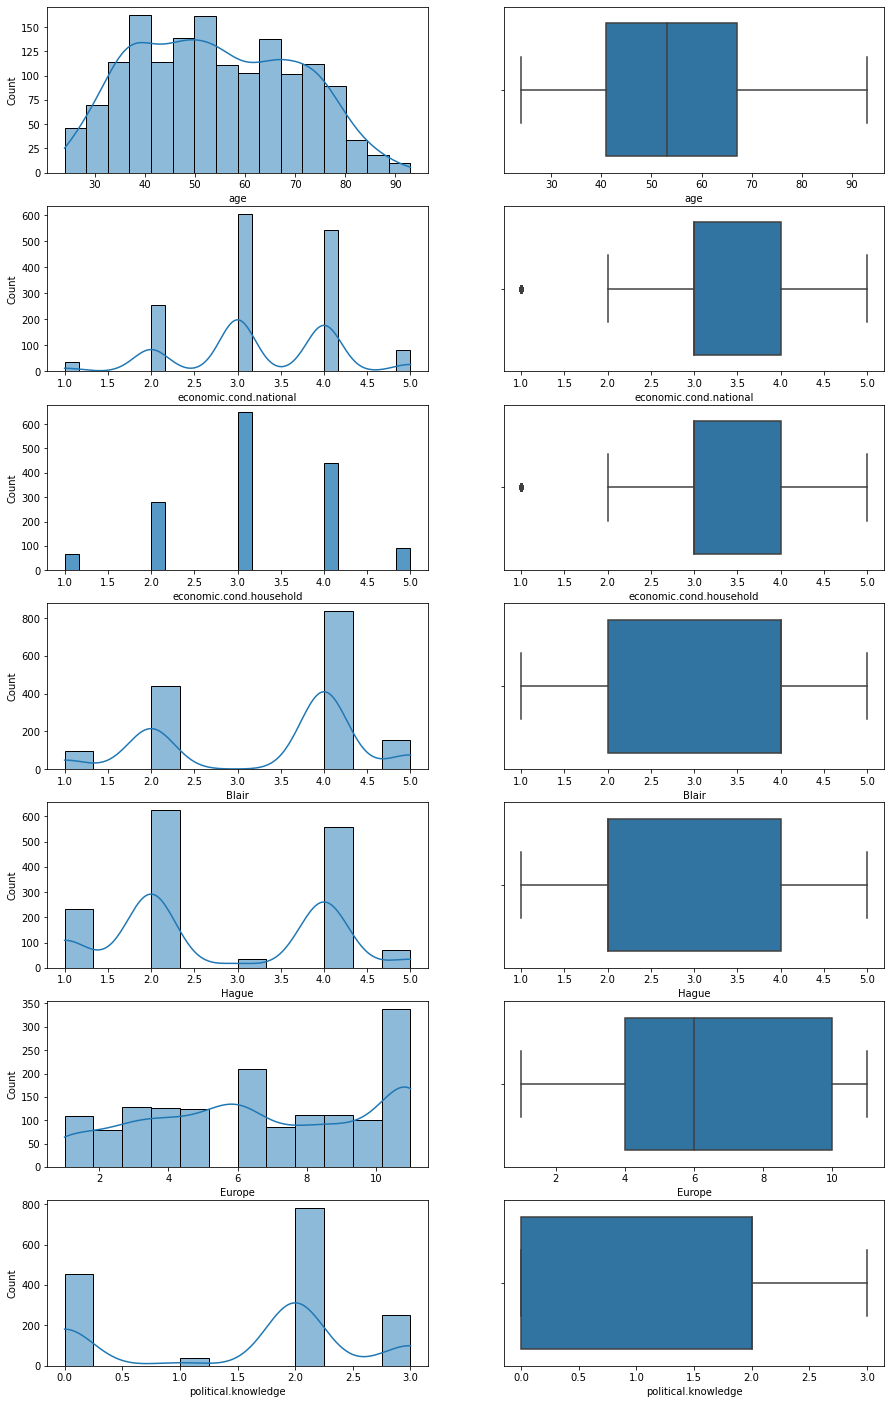

In [15]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,25)
sns.histplot(df['age'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['age'],data=df,ax=axes[0][1])
sns.histplot(df['economic.cond.national'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['economic.cond.national'],data=df,ax=axes[1][1])
sns.histplot(x=df['economic.cond.household'],data=df,ax=axes[2][0])
sns.boxplot(df['economic.cond.household'],data=df, ax=axes[2][1])
sns.histplot(x='Blair', data=df , kde=True,ax=axes[3][0])
sns.boxplot(df['Blair'],data=df, ax=axes[3][1])
sns.histplot(df['Hague'], kde=True, ax=axes[4][0])
sns.boxplot(df['Hague'],data=df, ax=axes[4][1])
sns.histplot(x='Europe', data=df , kde=True,ax=axes[5][0])
sns.boxplot(df['Europe'],data=df, ax=axes[5][1])
sns.histplot(x='political.knowledge', data=df , kde=True,ax=axes[6][0])
sns.boxplot(df['political.knowledge'],data=df, ax=axes[6][1])
plt.show()

### Observations from Univariate Analysis:

Outliers are not present in the dataset except for economic.cond.national,economic.cond.household.

Age variable is normally distributed

### Making different list for categorical columns and numerical columns

In [16]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print('Categorical variables:\n',cat) 
print('Numerical variables:\n',num)


Categorical variables:
 ['vote', 'gender']
Numerical variables:
 ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


### Summary statistics of our dataframe for numerical and categorical columns

In [17]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [18]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


#### Summary statistics

The mean age group of voters is 54 years, minimum and maximum age being 24 and 93 respectively.

Assessment of current household economic condition is on par with the assessment of current national economic conditions.

Labour leader Blair fares well in comparison to the Conservative Leader Hague.

People have a mixed feeling towards European integration.

Knowledge of parties' positions on European integration also has got a mean value of 1.5 indicates a thorogh knowledge is not present with either of the parties.

#### Unique values for categorical variables

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




<AxesSubplot:xlabel='vote', ylabel='count'>

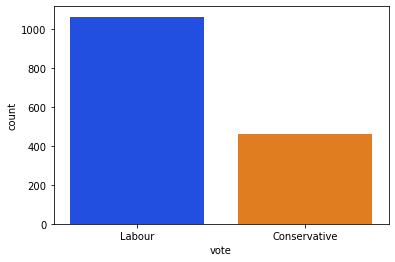

In [20]:
sns.countplot(x=df['vote'], palette='bright')

In [21]:
df['vote'].value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

#### Labour party has got 69.7 % vote and Conservative party has got 30 % votes, proving majority to Labor party

<AxesSubplot:xlabel='gender', ylabel='count'>

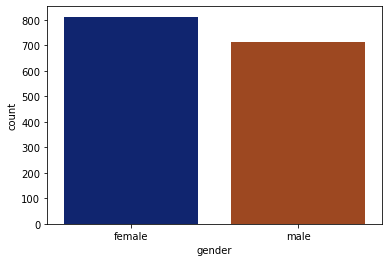

In [22]:
sns.countplot(x=df['gender'], palette='dark')

In [23]:
df['gender'].value_counts(normalize=True)

female    0.532459
male      0.467541
Name: gender, dtype: float64

#### Percentage of female voters (53.2%) are more than the percentage of male voters (46.7%). 

### Inferences from Univariate Analysis:

Outliers are not present in the dataset except for economic.cond.national,economic.cond.household.

Age variable is normally distributed.

Labour party has got 69.7 % vote and Conservative party has got 30 % votes, proving majority to Labor party.

Percentage of female voters (53%) are more than the percentage of male voters (47%).

Skewness of the variables present in the dataset is between -0.5 to 0.5, indicates that the data is fairly symmetrical.

The kurtosis of the continuous variables present in the dataset is less than zero, indicates that the distribution is light tailed.

## Bivariate Analysis

<AxesSubplot:xlabel='vote', ylabel='count'>

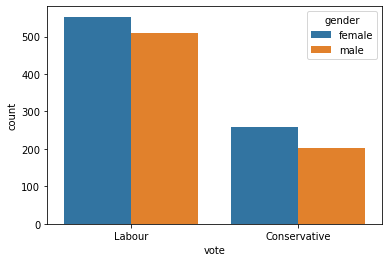

In [24]:
sns.countplot(x="vote", hue="gender", data=df)

The votes of female voters are more of each of the parties, Labour and Conservative. 

<AxesSubplot:xlabel='age', ylabel='vote'>

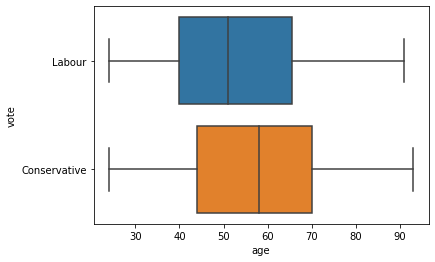

In [25]:
sns.boxplot(x=df['age'],y=df['vote'])

People in the age group of 40 years to 65 years have voted for Labour party. 
People in the age group of 44 years to 70 years have voted for Conservative party. 

<AxesSubplot:xlabel='Europe', ylabel='vote'>

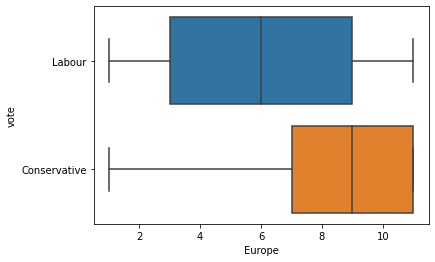

In [26]:
sns.boxplot(x=df['Europe'],y=df['vote'])

People with  ‘Eurosceptic’ sentiment has voted for Conservative party. 

Majority of the people who don't oppose closer connections between Britain and the European Union have voted for Labour party. 

The strength of the people who possess Eurosceptic sentiment is comparatively lesser than the other group.  

<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

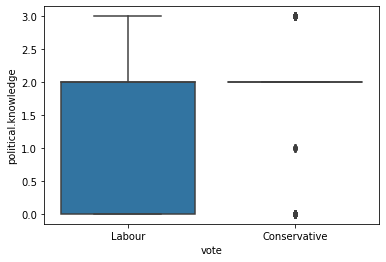

In [27]:
sns.boxplot(x=df['vote'],y=df['political.knowledge'])

People who possesses political knowledge of parties' positions on European integration have voted for Labour party. 

Conservative party vote has a mix of voters with minimum to complete political knowledge of parties position on European Integration. 

<AxesSubplot:xlabel='economic.cond.national', ylabel='vote'>

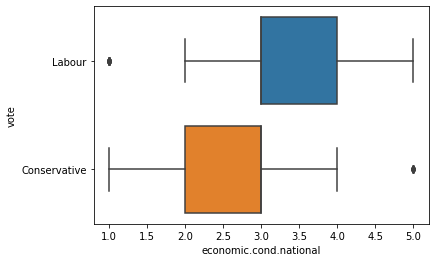

In [28]:
sns.boxplot(x=df['economic.cond.national'],y=df['vote'])

People whose current national economic conditions (both national and household) are greater have preferred to vote for Labour party.

People who are in the lower band of economic conditions (both national and household) have preferred to vote for conservative party. 

<AxesSubplot:xlabel='economic.cond.household', ylabel='vote'>

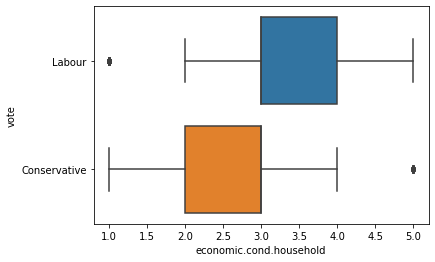

In [29]:
sns.boxplot(x=df['economic.cond.household'],y=df['vote'])

In [30]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

### Distribution of the variables Check

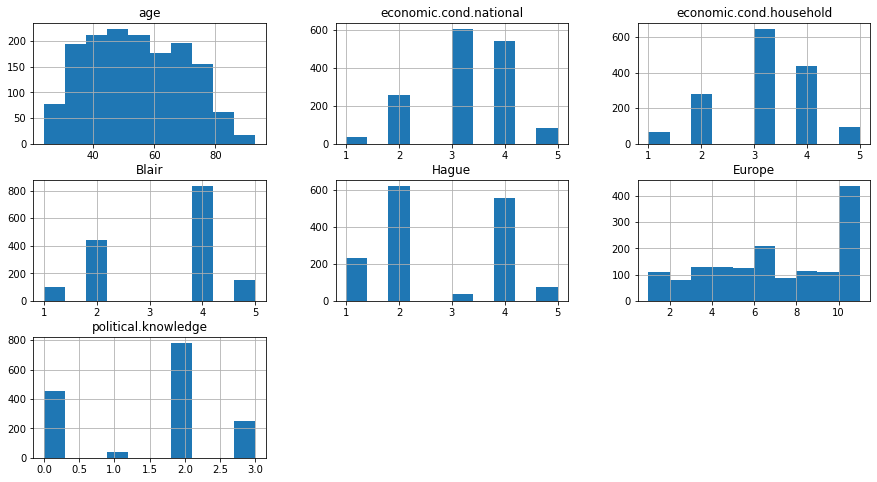

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']].hist();

Age is normally distributed. Europe though the distribution is continuous, it is skewed towards right. 
Other variables, 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'political.knowledge' are discrete


### Pair Plot

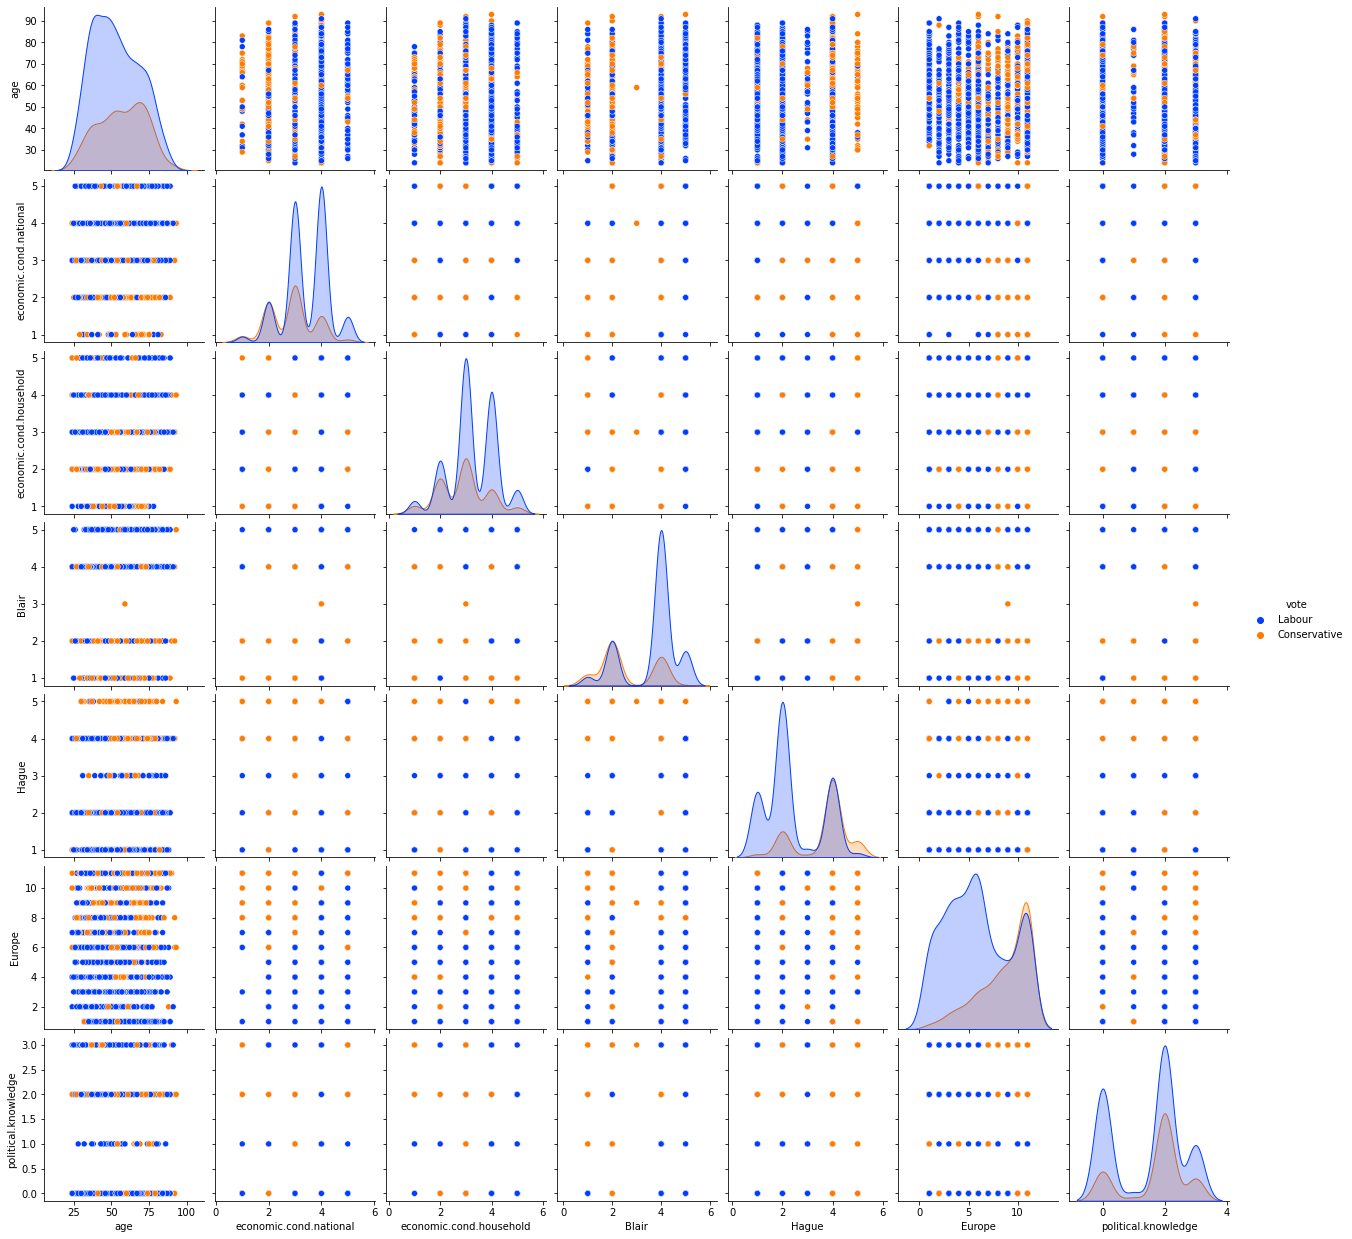

In [32]:
sns.pairplot(df,hue="vote",diag_kind='kde',palette='bright')
plt.show()

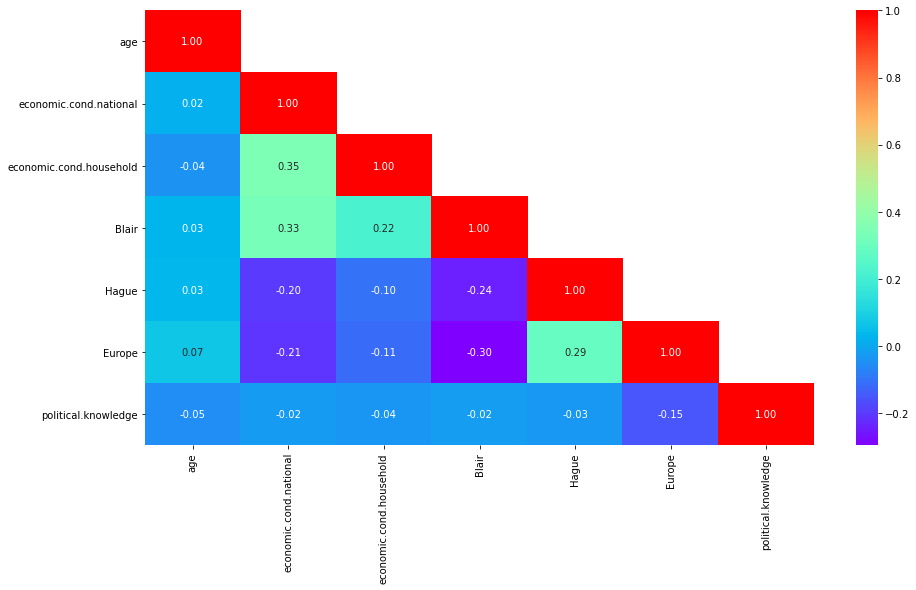

In [33]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

### Inferences from Bivariate Analysis:

No co-relation exists between any of the variables in the dataset

People are inclined towards Labour party than the Conservative party

###  Check outliers - Box Plot with Outliers 

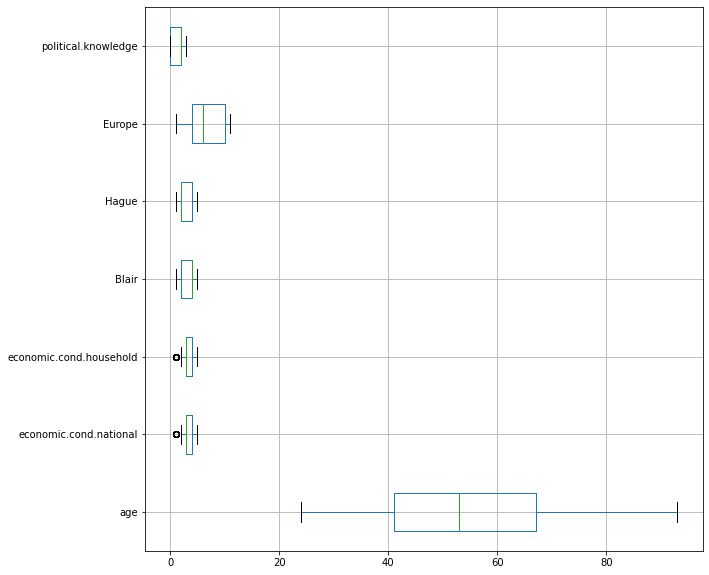

In [34]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

There are nearly no outliers in most of the numerical columns, only outlier is in Assessment of current national economic conditions and Assessment of current household economic conditions variable. 

In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier 

### Outlier Treatment

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

In [37]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

### Outlier Proportion

In [38]:
Q1,Q3=np.percentile(df["economic.cond.national"],[25,75])
IQR=Q3-Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Lower range for economic cond. national',(Q1-(1.5 * IQR)))
print('Q1 for economic cond. national',Q1)
print('Q3 for economic cond. national',Q3)
df[df['economic.cond.national']<1.5]
print('% of Outlier in NATIONAL ECONOMIC CONDITIONS upper:',round(df[df['economic.cond.national']>142.5]['economic.cond.national'].count()*100/len(df)), '%')
print('% of Outlier in NATIONAL ECONOMIC CONDITIONS lower:',round(df[df['economic.cond.national']<-53.5]['economic.cond.national'].count()*100/len(df)), '%')

Lower range for economic cond. national 1.5
Q1 for economic cond. national 3.0
Q3 for economic cond. national 4.0
% of Outlier in NATIONAL ECONOMIC CONDITIONS upper: 0 %
% of Outlier in NATIONAL ECONOMIC CONDITIONS lower: 0 %


In [39]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

### Outlier Proportion

In [151]:
Q1 = df['economic.cond.national'].quantile(q = 0.25)
Q3 = df['economic.cond.national'].quantile(q = 0.75)
print('national economic condition - 1st Quartile(Q1) is:', Q1)
print('national economic condition - 3rd Quartile(Q3) is:', Q3)
print('IQR of national economic condition is', stats.iqr(df['economic.cond.national']))
L_outliers = Q1-1.5*(Q3-Q1)
U_outliers = Q3+1.5*(Q3-Q1)
print('Lower outliers in Current national economic condition:', L_outliers)
print('Upper outliers in Current national economic condition:', U_outliers)
print('No of outliers in Current national economic condition upper :', df[df['economic.cond.national']>142.5]['economic.cond.national'].count())
print('No of outliers in Current national economic condition lower :', df[df['economic.cond.national']<-53.5]['economic.cond.national'].count())
print('% of Outlier in Current national economic condition upper:',round(df[df['economic.cond.national']>142.5]['economic.cond.national'].count()*100/len(df)), '%')
print('% of Outlier in Current national economic condition lower:',round(df[df['economic.cond.national']<-53.5]['economic.cond.national'].count()*100/len(df)), '%')

print('\n') 

Q1 = df['economic.cond.household'].quantile(q = 0.25)
Q3 = df['economic.cond.household'].quantile(q = 0.75)
print('Household economic conditions - 1st Quartile(Q1) is:', Q1)
print('Household economic conditions - 3rd Quartile(Q3) is:', Q3)
print('IQR of economic.cond.household is', stats.iqr(df['economic.cond.household']))
L_outliers = Q1-1.5*(Q3-Q1)
U_outliers = Q3+1.5*(Q3-Q1)
print('Lower outliers in Household economic conditions:', L_outliers)
print('Upper outliers in Household economic conditions:', U_outliers)
print('No of outliers in Household economic conditions upper:', df[df['economic.cond.household']>142.5]['economic.cond.household'].count())
print('No of outliers in Household economic conditions lower:', df[df['economic.cond.household']<-53.5]['economic.cond.household'].count())
print('% of Outlier in Household economic conditions upper:',round(df[df['economic.cond.household']>142.5]['economic.cond.household'].count()*100/len(df)), '%')
print('% of Outlier in Household economic conditions lower:',round(df[df['economic.cond.household']<-53.5]['economic.cond.household'].count()*100/len(df)), '%')


national economic condition - 1st Quartile(Q1) is: 3.0
national economic condition - 3rd Quartile(Q3) is: 4.0
IQR of national economic condition is 1.0
Lower outliers in Current national economic condition: 1.5
Upper outliers in Current national economic condition: 5.5
No of outliers in Current national economic condition upper : 0
No of outliers in Current national economic condition lower : 0
% of Outlier in Current national economic condition upper: 0 %
% of Outlier in Current national economic condition lower: 0 %


Household economic conditions - 1st Quartile(Q1) is: 3.0
Household economic conditions - 3rd Quartile(Q3) is: 4.0
IQR of economic.cond.household is 1.0
Lower outliers in Household economic conditions: 1.5
Upper outliers in Household economic conditions: 5.5
No of outliers in Household economic conditions upper: 0
No of outliers in Household economic conditions lower: 0
% of Outlier in Household economic conditions upper: 0 %
% of Outlier in Household economic conditions

<AxesSubplot:>

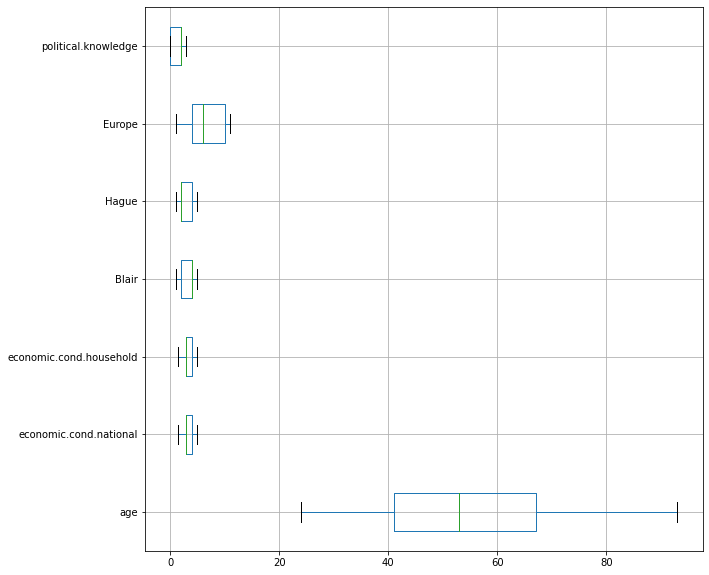

In [41]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

### Excluding the Dependent variable 'vote'

In [42]:
cat

['vote', 'gender']

In [43]:
cat1=['gender']

#### Label Encoding for the independent categorical variable

Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . 

This is done to ensure that we do not land in to dummy trap

In [44]:
df =pd.get_dummies(df, columns=cat1,drop_first=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   object 
 1   age                      1525 non-null   int64  
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   int64  
 5   Hague                    1525 non-null   int64  
 6   Europe                   1525 non-null   int64  
 7   political.knowledge      1525 non-null   int64  
 8   gender_male              1525 non-null   uint8  
dtypes: float64(2), int64(5), object(1), uint8(1)
memory usage: 96.9+ KB


In [45]:
## Converting the 'vote' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder
## Defining a Label Encoder object instance
LE = LabelEncoder()
## Applying the created Label Encoder object for the target class
## Assigning the 0 to Conservative and 1 to Labour
df['vote'] = LE.fit_transform(df['vote'])
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1
2,1,35,4.0,4.0,5,2,3,2,1
3,1,24,4.0,2.0,2,1,4,0,0
4,1,41,2.0,2.0,1,1,6,2,1


In [46]:
df.shape

(1525, 9)

### Train-Test Split 

Split X and y into training and test set in 70:30 ratio with random_state=1

In [47]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [48]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
print('Train Dataset - Independent Variables\n',X_train.head())
print('\nTrain Dataset - Dependent Variables\n',y_train.head())
print('\nTest Dataset - Independent Variable\n',X_test.head())
print('\nTest Dataset - Dependent Variable\n',y_test.head())

Train Dataset - Independent Variables
       age  economic.cond.national  economic.cond.household  Blair  Hague  \
1453   62                     3.0                      3.0      2      2   
275    49                     3.0                      3.0      2      2   
1130   74                     4.0                      4.0      4      4   
1153   57                     2.0                      3.0      4      2   
1172   24                     4.0                      5.0      4      4   

      Europe  political.knowledge  gender_male  
1453      11                    2            0  
275        8                    0            0  
1130       7                    0            1  
1153       6                    2            0  
1172       6                    0            1  

Train Dataset - Dependent Variables
 1453    1
275     0
1130    1
1153    1
1172    0
Name: vote, dtype: int32

Test Dataset - Independent Variable
       age  economic.cond.national  economic.cond.household 

In [49]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 8)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 8)
Number of rows and columns of the test set for the dependent variable: (458,)


# Logistic Regression

### Formulate a logistic regression model on the train data.

In [50]:
LogReg_model = LogisticRegression(max_iter=1000)
LogReg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predicting on Training and Test dataset

In [51]:
ytrain_predict = LogReg_model.predict(X_train)
ytest_predict = LogReg_model.predict(X_test)

### Logistic Regression Model Evaluation

In [52]:
# Accuracy - Training Data
print('Accuracy of the Logistic Regression in Training dataset',LogReg_model.score(X_train, y_train))

Accuracy of the Logistic Regression in Training dataset 0.8397375820056232


In [53]:
# Accuracy - Test Data
print('Accuracy of the Logistic Regression in Test dataset',LogReg_model.score(X_test, y_test))

Accuracy of the Logistic Regression in Test dataset 0.8209606986899564


### Confusion Matrix - Logistic Regression Model

Confusion Matrix for the training data in the Logistic Regression Model
 [[229 103]
 [ 68 667]]


Text(0.5, 1.0, 'Confusion Matrix for the training data in the Logistic Regression Model')

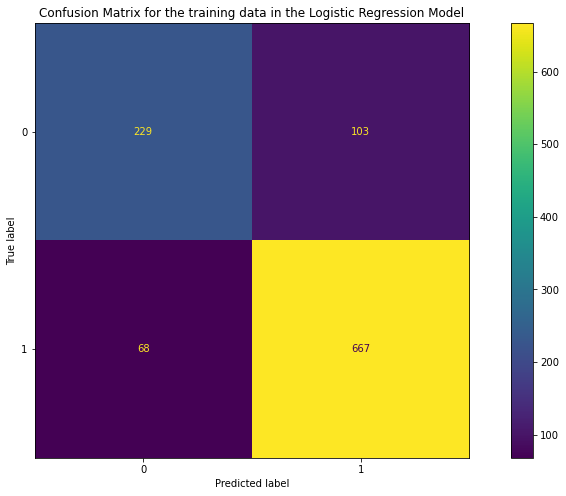

In [54]:
#Confusion Matrix for the training data
print('Confusion Matrix for the training data in the Logistic Regression Model\n',confusion_matrix(y_train, ytrain_predict))
plot_confusion_matrix(LogReg_model,X_train,y_train);
plt.title('Confusion Matrix for the training data in the Logistic Regression Model')

Confusion Matrix for the test data in the Logistic Regression Model
 [[ 85  45]
 [ 37 291]]


Text(0.5, 1.0, 'Confusion Matrix for the test data in the Logistic Regression Model')

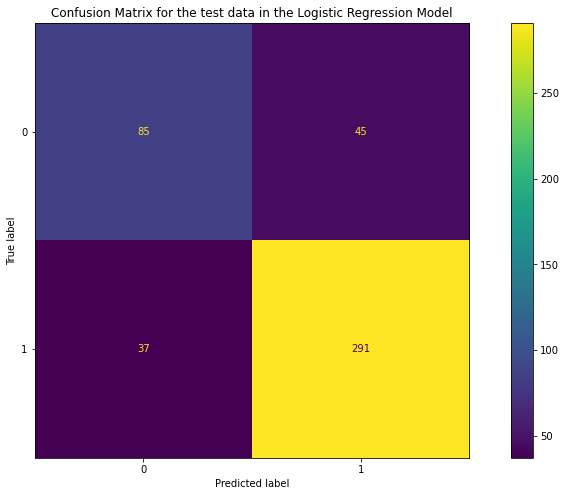

In [55]:
#Confusion Matrix for the test data
print('Confusion Matrix for the test data in the Logistic Regression Model\n',confusion_matrix(y_test, ytest_predict))
plot_confusion_matrix(LogReg_model,X_test,y_test);
plt.title('Confusion Matrix for the test data in the Logistic Regression Model')

### Classification Report - Logistic Regression Model

In [56]:
print('Classification Report of the training data in Logistic Regression Model\n\n',classification_report(y_train, ytrain_predict))

Classification Report of the training data in Logistic Regression Model

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [57]:
print('Classification Report of the test data in Logistic Regression Model\n\n',classification_report(y_test, ytest_predict))

Classification Report of the test data in Logistic Regression Model

               precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



### AUC and ROC - Logistic Regression Model

AUC score for Training Data in the Logistic Regression Model
: 0.890
AUC score of Test data in the Logistic Regression Model: 0.883


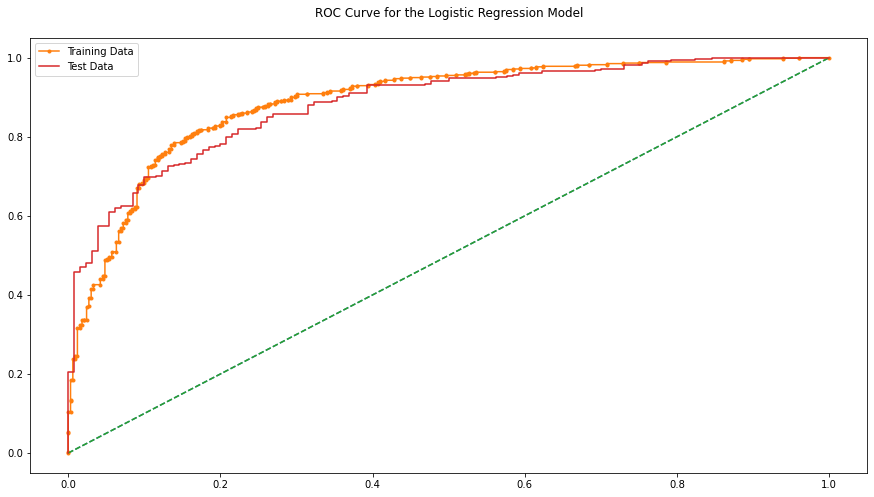

In [149]:
# AUC and ROC for the training data
# predict probabilities
probs = LogReg_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC score for Training Data in the Logistic Regression Model\n: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.title('ROC Curve for Training Data in the Logistic Regression Model\n')
plt.legend(loc='best')

# AUC and ROC for the test data
# predict probabilities
probs = LogReg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC score of Test data in the Logistic Regression Model: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label='Test Data');
plt.title('ROC Curve for the Logistic Regression Model\n')
# show the plot
plt.legend(loc='best')
plt.show()

### Applying GridSearchCV for Logistic Regression

In [59]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton'],
      'tol':[0.0001,0.00001]}

In [60]:
LogReg_Opt_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [61]:
grid_search = GridSearchCV(estimator = LogReg_Opt_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [63]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [64]:
best_model = grid_search.best_estimator_

In [65]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [66]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.920058,0.079942
1,0.689762,0.310238
2,0.346642,0.653358
3,0.487722,0.512278
4,0.161352,0.838648


Confusion Matrix for the training data in the Logistic Regression Optimized Model


Text(0.5, 1.0, 'Confusion Matrix for the training data in the Logistic Regression Optimized Model')

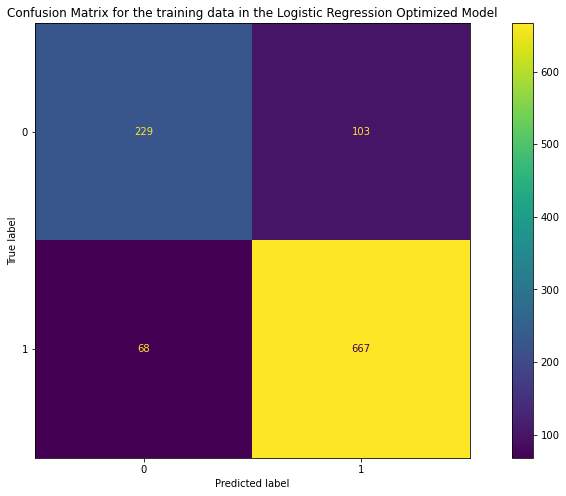

In [67]:
## Confusion matrix on the training data

print('Confusion Matrix for the training data in the Logistic Regression Optimized Model\n',plot_confusion_matrix(best_model,X_train,y_train))
plt.title('Confusion Matrix for the training data in the Logistic Regression Optimized Model')

Confusion Matrix for the test data in the Logistic Regression Optimized Model


Text(0.5, 1.0, 'Confusion Matrix for the test data in the Logistic Regression Optimized Model')

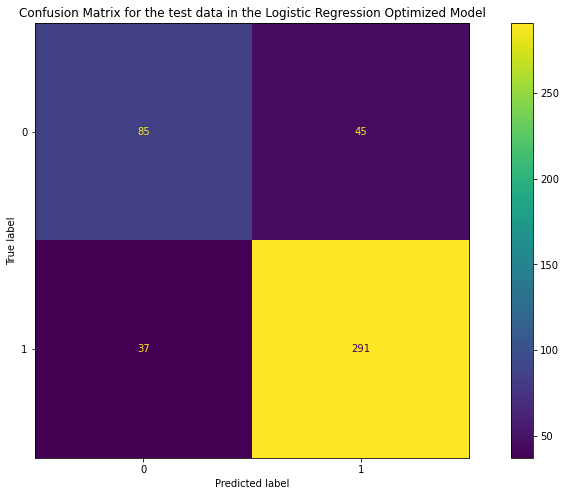

In [68]:
## Confusion matrix on the test data

print('Confusion Matrix for the test data in the Logistic Regression Optimized Model\n',plot_confusion_matrix(best_model,X_test,y_test))
plt.title('Confusion Matrix for the test data in the Logistic Regression Optimized Model')


In [69]:
print('Classification Report of the training data in Logistic Regression Optimized Model\n\n',classification_report(y_train, ytrain_predict),'\n');

Classification Report of the training data in Logistic Regression Optimized Model

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



In [70]:
print('Classification Report of the test data in Logistic Regression Optimized Model\n\n',classification_report(y_test, ytest_predict),'\n');

Classification Report of the test data in Logistic Regression Optimized Model

               precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



In [71]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Class=model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


In [72]:
print(Class.coef_, Class.intercept_)

[[-0.02065241  0.37302829  0.16997518  0.57009179 -0.83832316 -0.23804024
  -0.4788061   0.30145485]] [3.28222157]


age --> -0.02065241

economic.cond.national -->  0.37302829

economic.cond.household --> 0.16997518

Blair --> 0.57009179

Hague --> -0.83832316

Europe --> -0.23804024

political.knowledge --> -0.4788061

gender_male --> 0.30145485

The important factors that determines which party gets the vote is as follows:

• Assessment of the Labour leader Blair has got co-efficient of 0.57

• Next feature of importance goes to the Assessment of current national economic conditions with co-effiecnt of 0.37

• The next feature that contributes is Gender followed by the assessment of current household economic condition. 

• The feature Europe, Hague, political knowledge, age has very minimum importance in prediction of vote. 

# LDA

#### Build LDA Model

In [73]:
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)

In [74]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print('Accuracy score of the LDA model - Train Dataset\n',model_score)
print('Confusion Matrix of the LDA model - Train Dataset\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the LDA model - Train Dataset\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the LDA model - Train Dataset
 0.8397375820056232
Confusion Matrix of the LDA model - Train Dataset
 [[236  96]
 [ 75 660]]
Classification Report of the LDA model - Train Dataset
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [75]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print('Accuracy score of the LDA model - Test Dataset\n',model_score)
print('Confusion Matrix of the LDA model - Test Dataset\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the LDA model - Test Dataset\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the LDA model - Test Dataset
 0.8187772925764192
Confusion Matrix of the LDA model - Test Dataset
 [[ 86  44]
 [ 39 289]]
Classification Report of the LDA model - Test Dataset
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



#### Prediction on Training and Test dataset

In [76]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDA_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA_model.predict(X_test)

#### Training Data and Test Data Confusion Matrix Comparison

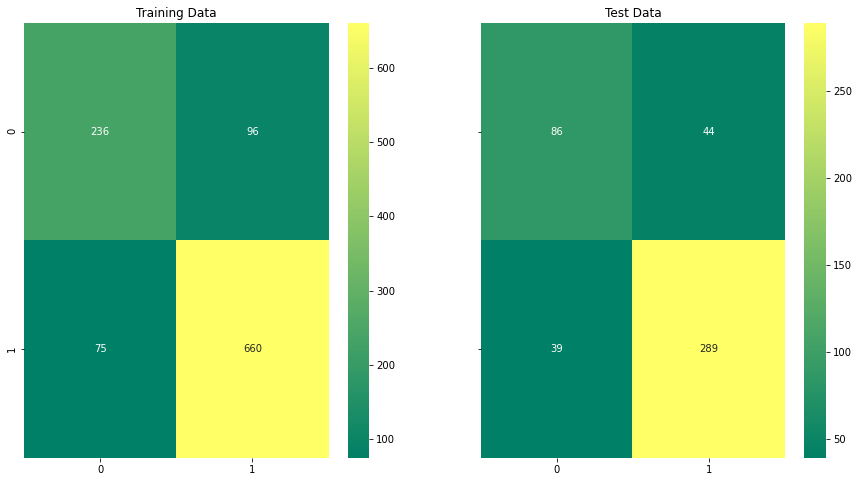

In [77]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='summer',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='summer',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [78]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



### Probability prediction for the training and test data

In [79]:
# Training Data Probability Prediction
pred_prob_train = LDA_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDA_model.predict_proba(X_test)

In [80]:
pred_prob_train[:,1]

array([0.3513498 , 0.83711038, 0.81903569, ..., 0.78687872, 0.9538792 ,
       0.57931822])

AUC for the Training Data in the LDA model: 0.889
AUC for the Test Data in the LDA model: 0.884


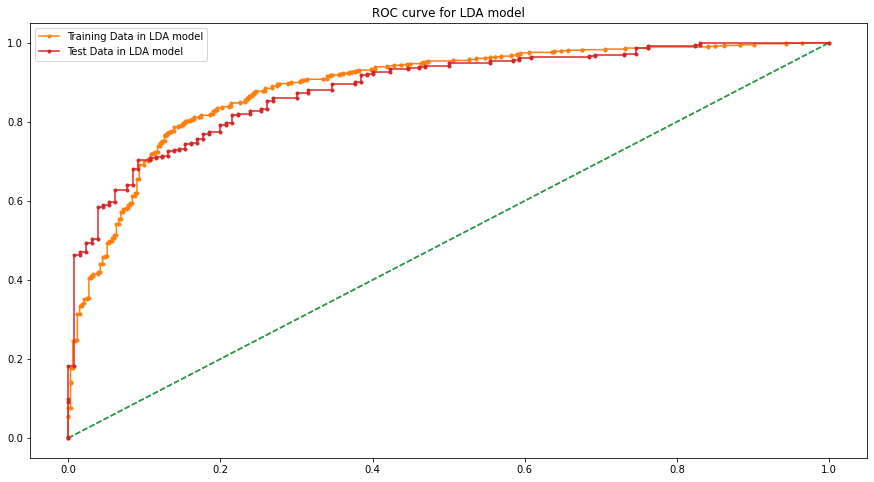

In [150]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data in the LDA model: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data in LDA model')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data in the LDA model: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data in LDA model')
plt.title('ROC curve for LDA model')
# show the plot
plt.legend(loc='best')
plt.show()

The AUC on the training as well as the test set is about 88%, which is roughly the same proportion as the class 0 observations in the dataset. 

This model is affected by a class imbalance problem. Since we only have 1525 observations, if re-build the same LDA model with more number of data points, an even better model could be built.

### Change the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.7545
F1 Score 0.847 

Confusion Matrix


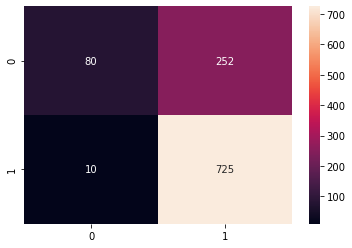

0.2 

Accuracy Score 0.7948
F1 Score 0.8667 

Confusion Matrix


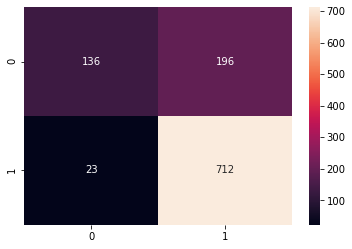

0.3 

Accuracy Score 0.8201
F1 Score 0.8791 

Confusion Matrix


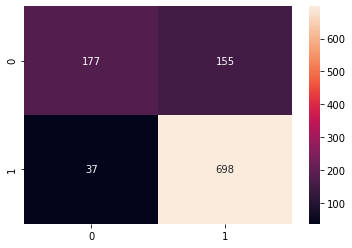

0.4 

Accuracy Score 0.8322
F1 Score 0.8835 

Confusion Matrix


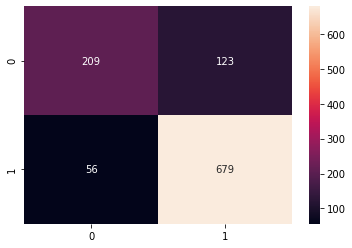

0.5 

Accuracy Score 0.8397
F1 Score 0.8853 

Confusion Matrix


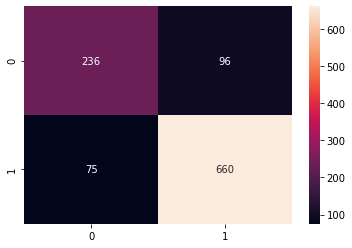

0.6 

Accuracy Score 0.8313
F1 Score 0.8757 

Confusion Matrix


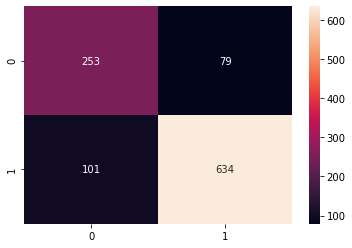

0.7 

Accuracy Score 0.8219
F1 Score 0.8649 

Confusion Matrix


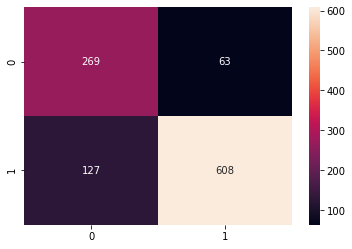

0.8 

Accuracy Score 0.7844
F1 Score 0.8258 

Confusion Matrix


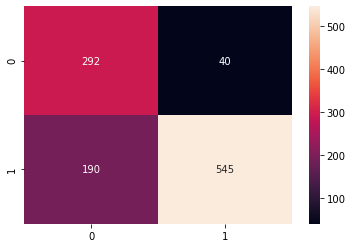

0.9 

Accuracy Score 0.6935
F1 Score 0.7268 

Confusion Matrix


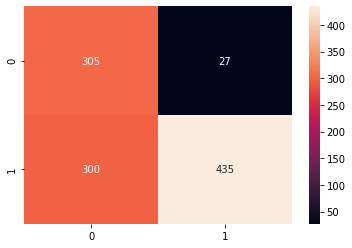

In [82]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We see that the cut off vaue 0.4 gives better accuracy & the best 'f1-score than the rest of the custom cut-off values.

Let us evaluate the predictions of the test data using these cut-off values.

In [83]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

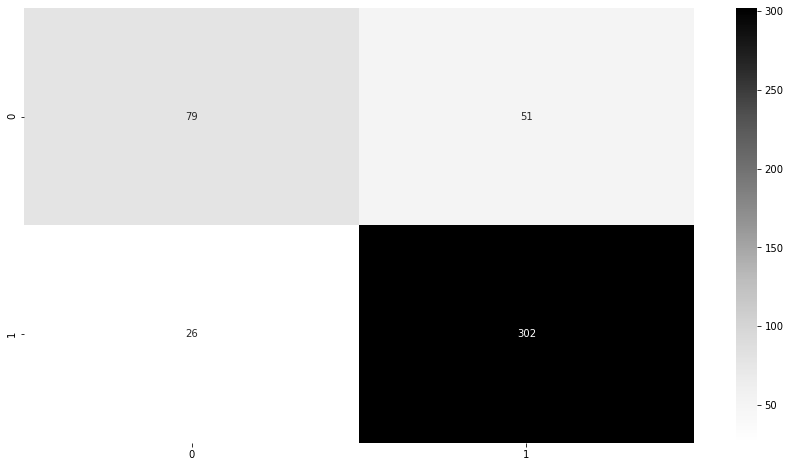

In [84]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [85]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.75      0.61      0.67       130
           1       0.86      0.92      0.89       328

    accuracy                           0.83       458
   macro avg       0.80      0.76      0.78       458
weighted avg       0.83      0.83      0.83       458
 



# Gaussian Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [87]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

### Performance Matrix on train data set

In [88]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print('Accuracy score of the Gaussian NB model - Train Dataset\n',model_score)
print('Confusion Matrix of the Gaussian NB model - Train Dataset\n',metrics.confusion_matrix(y_train, y_train_predict))  ## confusion_matrix
print('Classification Report of the Gaussian NB model - Train Dataset\n',metrics.classification_report(y_train, y_train_predict)) ## classification_report

Accuracy score of the Gaussian NB model - Train Dataset
 0.8322399250234301
Confusion Matrix of the Gaussian NB model - Train Dataset
 [[240  92]
 [ 87 648]]
Classification Report of the Gaussian NB model - Train Dataset
               precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [89]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)            
print('Accuracy score of the Gaussian NB model - Test Dataset\n',model_score) ## Accuracy
print('Confusion Matrix of the Gaussian NB model - Test Dataset\n',metrics.confusion_matrix(y_test, y_test_predict)) ## confusion_matrix
print('Classification Report of the Gaussian NB model - Test Dataset\n',metrics.classification_report(y_test, y_test_predict)) ## classification_report

Accuracy score of the Gaussian NB model - Test Dataset
 0.8231441048034934
Confusion Matrix of the Gaussian NB model - Test Dataset
 [[ 94  36]
 [ 45 283]]
Classification Report of the Gaussian NB model - Test Dataset
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

Performing features scaling does not have much impact on Naive Bayes.

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. 

### Cross Validation on Naive Bayes Model

In [127]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model, X_train, y_train, cv=10)
scores

array([0.81308411, 0.82242991, 0.82242991, 0.85046729, 0.81308411,
       0.81308411, 0.8317757 , 0.88679245, 0.82075472, 0.82075472])

In [128]:
scores = cross_val_score(NB_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.86956522, 0.82608696, 0.80434783, 0.76086957,
       0.80434783, 0.84782609, 0.91304348, 0.88888889, 0.82222222])

In [129]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are not almost same.

## The scores vary from 0.76 to 0.91. Hence model tuning is required.

# KNN Model

A good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN

In [90]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]].apply(zscore)

In [91]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,0
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,0
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1


### Building a KNN model

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [93]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print('Accuracy score of the KNN model - Train Dataset\n',model_score)
print('Confusion Matrix of the KNN model - Train Dataset\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the KNN model - Train Dataset\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the KNN model - Train Dataset
 0.8556701030927835
Confusion Matrix of the KNN model - Train Dataset
 [[242  90]
 [ 64 671]]
Classification Report of the KNN model - Train Dataset
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.85      0.86      0.85      1067



In [94]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy score of the KNN model - Test Dataset\n',model_score)
print('Confusion Matrix of the KNN model - Test Dataset\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the KNN model - Test Dataset\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the KNN model - Test Dataset
 0.7860262008733624
Confusion Matrix of the KNN model - Test Dataset
 [[ 80  50]
 [ 48 280]]
Classification Report of the KNN model - Test Dataset
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.73      0.74       458
weighted avg       0.79      0.79      0.79       458



#### Default value n_neighbors=5, lets check the performance for K=7

In [95]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [96]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print('Accuracy score of the KNN model (n_neighbors=7)- Train Dataset\n',model_score)
print('Confusion Matrix of the KNN model (n_neighbors=7) - Train Dataset\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the KNN model (n_neighbors=7)- Train Dataset\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the KNN model (n_neighbors=7)- Train Dataset
 0.8500468603561387
Confusion Matrix of the KNN model (n_neighbors=7) - Train Dataset
 [[233  99]
 [ 61 674]]
Classification Report of the KNN model (n_neighbors=7)- Train Dataset
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       332
           1       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [97]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy score of the KNN model (n_neighbors=7)- Test Dataset\n',model_score)
print('Confusion Matrix of the KNN model (n_neighbors=7) - Test Dataset\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the KNN model (n_neighbors=7)- Test Dataset\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the KNN model (n_neighbors=7)- Test Dataset
 0.7903930131004366
Confusion Matrix of the KNN model (n_neighbors=7) - Test Dataset
 [[ 78  52]
 [ 44 284]]
Classification Report of the KNN model (n_neighbors=7)- Test Dataset
               precision    recall  f1-score   support

           0       0.64      0.60      0.62       130
           1       0.85      0.87      0.86       328

    accuracy                           0.79       458
   macro avg       0.74      0.73      0.74       458
weighted avg       0.79      0.79      0.79       458



#### Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [98]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.26419213973799127,
 0.23144104803493448,
 0.2139737991266376,
 0.20960698689956336,
 0.20742358078602618,
 0.21179039301310043,
 0.19432314410480345,
 0.18558951965065507,
 0.18558951965065507,
 0.18777292576419213]

#### Plot misclassification error vs k (with k value on X-axis) using matplotlib

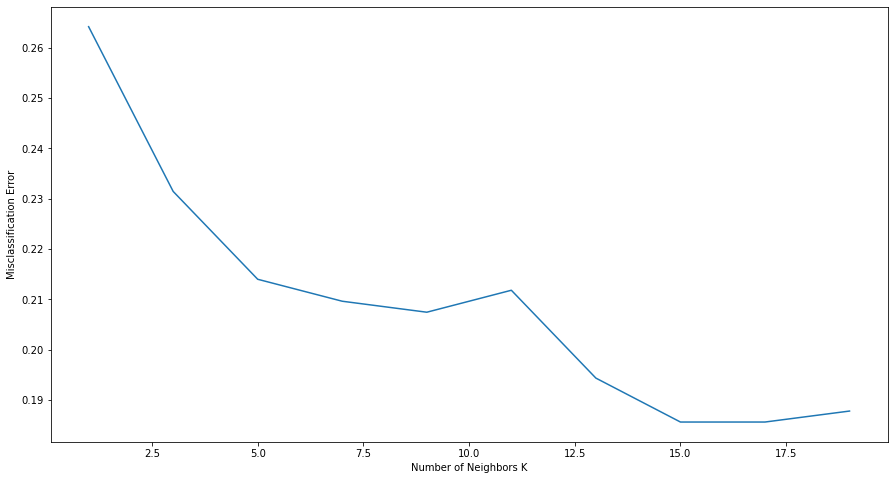

In [99]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 15 it is giving the best test accuracy lets check train and test for K=17 with other evaluation metrics

In [100]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [101]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8247422680412371
[[212 120]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       332
           1       0.85      0.91      0.88       735

    accuracy                           0.82      1067
   macro avg       0.80      0.77      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [102]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8144104803493449
[[ 86  44]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



## SMOTE

In [133]:
# !pip install imbalanced-learn

In [134]:
from imblearn.over_sampling import SMOTE

SMOTE is only applied on the train data set

In [136]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [137]:
## Let's check the shape after SMOTE
X_train_res.shape

(1470, 8)

### Naive Bayes with SMOTE

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [139]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8210884353741497
[[603 132]
 [131 604]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       735
           1       0.82      0.82      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [140]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.777292576419214
[[103  27]
 [ 75 253]]
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       130
           1       0.90      0.77      0.83       328

    accuracy                           0.78       458
   macro avg       0.74      0.78      0.75       458
weighted avg       0.81      0.78      0.79       458



### KNN With SMOTE

In [141]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [142]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8870748299319728
[[702  33]
 [133 602]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       735
           1       0.95      0.82      0.88       735

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470



In [143]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7489082969432315
[[104  26]
 [ 89 239]]
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       130
           1       0.90      0.73      0.81       328

    accuracy                           0.75       458
   macro avg       0.72      0.76      0.73       458
weighted avg       0.80      0.75      0.76       458



### Cross Validation on KNN Model

In [144]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.78231293, 0.79591837, 0.82993197, 0.82312925, 0.82312925,
       0.82993197, 0.85714286, 0.87755102, 0.87755102, 0.87755102])

In [145]:
scores = cross_val_score(KNN_SM_model, X_test, y_test, cv=10)
scores

array([0.84782609, 0.82608696, 0.82608696, 0.7826087 , 0.80434783,
       0.7826087 , 0.93478261, 0.80434783, 0.88888889, 0.8       ])

In [147]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are not almost same. 
## The score varies from 78% to 93%
## Hence our model tuning is required.


# Model Tuning

Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression

Check Train and Test RMSE
Check Train and Test Scores

In [103]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

### Random Forest Classifier

#### Building Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [105]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print('Accuracy score of the Training Dataset - Random Forest Classifier\n\n',model_score)
print('Confusion Matrix of the Training Dataset -  Random Forest Classifier\n\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the Training Dataset - Random Forest Classifier\n\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the Training Dataset - Random Forest Classifier

 0.9990627928772259
Confusion Matrix of the Training Dataset -  Random Forest Classifier

 [[331   1]
 [  0 735]]
Classification Report of the Training Dataset - Random Forest Classifier

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [106]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print('Accuracy score of the Test Dataset - Random Forest Classifier\n\n',model_score)
print('Confusion Matrix of the Test Dataset -  Random Forest Classifier\n\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the Test Dataset - Random Forest Classifier\n\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the Test Dataset - Random Forest Classifier

 0.8209606986899564
Confusion Matrix of the Test Dataset -  Random Forest Classifier

 [[ 90  40]
 [ 42 286]]
Classification Report of the Test Dataset - Random Forest Classifier

               precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Random forest output proves to be a clear case of Overfit

In [107]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
 
    else :
        i.fit(X_train_scaled,y_train)
        scores_train.append(i.score(X_train_scaled, y_train))
        scores_test.append(i.score(X_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          0.355620   0.356930        0.409969    0.373272
Decision Tree Regressor    0.021647   0.501091        0.997814   -0.235225
Random Forest Regressor    0.140624   0.364811        0.907737    0.345288
ANN Regressor              0.196754   0.380406        0.819387    0.288116


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 

Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

In other words, it tells you how concentrated the data is around the line of best fit. 

the prediction error is measured by the RMSE, which corresponds to the average difference between the observed known values of the outcome and the predicted value by the model.

Training score of Decision Tree regressor and Random Forest regressor is above 90% and the test score is very less. 

This indicates a clear case of Overfitting. 

#### Perform Grid Search to get the best parameters

### Grid Search on Random Forest

In [120]:
param_grid = {
    'max_depth': [5,10],
    'max_features': [4, 8],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30,50,75,100],
    'n_estimators': [300,400,500, 600]
}

rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [121]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10], 'max_features': [4, 8],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 75, 100],
                         'n_estimators': [300, 400, 500, 600]})

In [122]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}
RandomForestRegressor(max_depth=5, max_features=4, min_samples_leaf=3,
                      min_samples_split=30, n_estimators=500, random_state=1)


Best parameters : 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

In [123]:
best_rf_model = grid_search.best_estimator_

In [124]:
# Prediction on the training set
ytrain_predict = best_rf_model.predict(X_train)
ytest_predict = best_rf_model.predict(X_test)
## Getting the probabilities on the test set

ytest_predict_prob=best_rf_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

# Accuracy
print('Accuracy of the Random Forest in Train dataset Optimized model\n',best_rf_model.score(X_train, y_train))
print('Accuracy of the Random Forest in Test dataset Optimized model\n',best_rf_model.score(X_test, y_test))

## Confusion matrix on the training data
print('Confusion Matrix for Random Forest in Train dataset Optimized model\n',plot_confusion_matrix(best_rf_model,X_train,y_train))
plt.title('Confusion Matrix for Random Forest in Train dataset Optimized model\n')

## Confusion matrix on the test data
print('Confusion Matrix for Random Forest in Test dataset Optimized model\n',plot_confusion_matrix(best_rf_model,X_test,y_test))
plt.title('Confusion Matrix for the test data in the Logistic Regression Optimized Model')

print('Classification Report of the Random Forest in Train dataset Optimized model\n\n\n',classification_report(y_train, ytrain_predict),'\n');
print('Classification Report of the Random Forest in Test dataset Optimized model\n\n\n',classification_report(y_test, ytest_predict),'\n');

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

## Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [112]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print('Accuracy score of the Training Dataset - Bagging Random Forest Classifier\n\n',model_score)
print('Confusion Matrix of the Training Dataset - Bagging Random Forest Classifier\n\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the Training Dataset - Bagging Random Forest Classifier\n\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the Training Dataset - Bagging Random Forest Classifier

 0.9653233364573571
Confusion Matrix of the Training Dataset - Bagging Random Forest Classifier

 [[304  28]
 [  9 726]]
Classification Report of the Training Dataset - Bagging Random Forest Classifier

               precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [148]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print('Accuracy score of the Test Dataset - Bagging Random Forest Classifier\n\n',model_score)
print('Confusion Matrix of the Test Dataset - Bagging Random Forest Classifier\n\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the Test Dataset - Bagging Random Forest Classifier\n\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the Test Dataset - Bagging Random Forest Classifier

 0.8362445414847162
Confusion Matrix of the Test Dataset - Bagging Random Forest Classifier

 [[ 92  38]
 [ 37 291]]
Classification Report of the Test Dataset - Bagging Random Forest Classifier

               precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



## Boosting

#### Ada boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [115]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print('Accuracy score of the Train Dataset - Ada Boosting \n\n',model_score)
print('Confusion Matrix of the Train Dataset - Ada Boosting \n\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the Train Dataset - Ada Boosting \n\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the Train Dataset - Ada Boosting 

 0.8472352389878163
Confusion Matrix of the Train Dataset - Ada Boosting 

 [[238  94]
 [ 69 666]]
Classification Report of the Train Dataset - Ada Boosting 

               precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [116]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print('Accuracy score of the Test Dataset - Ada Boosting \n\n',model_score)
print('Confusion Matrix of the Test Dataset - Ada Boosting \n\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the Test Dataset - Ada Boosting \n\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the Test Dataset - Ada Boosting 

 0.8187772925764192
Confusion Matrix of the Test Dataset - Ada Boosting 

 [[ 90  40]
 [ 43 285]]
Classification Report of the Test Dataset - Ada Boosting 

               precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



### Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [118]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print('Accuracy score of the Train Dataset - Gradient Boosting \n\n',model_score)
print('Confusion Matrix of the Train Dataset - Gradient Boosting \n\n',metrics.confusion_matrix(y_train, y_train_predict))
print('Classification Report of the Train Dataset - Gradient Boosting \n\n',metrics.classification_report(y_train, y_train_predict))

Accuracy score of the Train Dataset - Gradient Boosting 

 0.8865979381443299
Confusion Matrix of the Train Dataset - Gradient Boosting 

 [[262  70]
 [ 51 684]]
Classification Report of the Train Dataset - Gradient Boosting 

               precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [119]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print('Accuracy score of the Test Dataset - Gradient Boosting \n\n',model_score)
print('Confusion Matrix of the Test Dataset - Gradient Boosting \n\n',metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report of the Test Dataset - Gradient Boosting \n\n',metrics.classification_report(y_test, y_test_predict))

Accuracy score of the Test Dataset - Gradient Boosting 

 0.8318777292576419
Confusion Matrix of the Test Dataset - Gradient Boosting 

 [[ 96  34]
 [ 43 285]]
Classification Report of the Test Dataset - Gradient Boosting 

               precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [280]:
import nltk
import random
import string # this is used for string manipulations

In [281]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.19.2
Pandas version: 1.1.3
Natural Language Tool Kit version: 3.5
Matplotlib version: 3.3.2


In [282]:
#Code Snippet to extract the three speeches:

import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
print('\n Inaugural Speech of President Franklin D. Roosevelt in 1941\n')
x=inaugural.raw('1941-Roosevelt.txt')
x
#inaugural.raw('1961-Kennedy.txt')
#inaugural.raw('1973-Nixon.txt')


 Inaugural Speech of President Franklin D. Roosevelt in 1941



[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\kpriyadh\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [283]:
!pip install TextBlob 
#conda install -c conda-forge textblob 

### Number of words in Franklin Roosevelt Speech

In [284]:
from textblob import TextBlob
x_split_words = x.split()
x_split_words

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789,',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States.',
 'In',
 "Washington's",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation.',
 'In',
 "Lincoln's",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time,',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings,',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'history',
 'has',
 'been,',
 'and',
 'to',
 'redisc

In [285]:
" ".join(x_split_words)

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States. In Washington\'s day the task of the people was to create and weld together a nation. In Lincoln\'s day the task of the people was to preserve that Nation from disruption from within. In this day the task of the people is to save that Nation and its institutions from disruption from without. To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction. Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live. There are men who doubt this. There are men who believe that democracy, as a form of 

In [286]:
print('Number of Characters in President Roosevelt speech',len(x))

Number of Characters in President Roosevelt speech 7571


In [287]:
print('Number of Words in President Roosevelt speech',len(x_split_words))

Number of Words in President Roosevelt speech 1360


In [288]:
print('Number of sentences in Roosevelt speech',len([x for x in x.split() if '.' in x]))

Number of sentences in Roosevelt speech 68


In [289]:
print('Average word length',(sum(len(word) for word in x_split_words)/len(x_split_words)))

Average word length 4.5397058823529415


In [290]:
print('\n Inaugural Speech of President John F. Kennedy in 1961\n')
y=inaugural.raw('1961-Kennedy.txt')
y


 Inaugural Speech of President John F. Kennedy in 1961



'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [291]:
print('Number of Characters in President John F. Kennedy speech',len(y))

Number of Characters in President John F. Kennedy speech 7618


In [292]:
y_split_words = y.split()
y_split_words

['Vice',
 'President',
 'Johnson,',
 'Mr.',
 'Speaker,',
 'Mr.',
 'Chief',
 'Justice,',
 'President',
 'Eisenhower,',
 'Vice',
 'President',
 'Nixon,',
 'President',
 'Truman,',
 'reverend',
 'clergy,',
 'fellow',
 'citizens,',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party,',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end,',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal,',
 'as',
 'well',
 'as',
 'change.',
 'For',
 'I',
 'have',
 'sworn',
 'I',
 'before',
 'you',
 'and',
 'Almighty',
 'God',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago.',
 'The',
 'world',
 'is',
 'very',
 'different',
 'now.',
 'For',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 'human',
 'poverty',
 'and',
 'all',
 'forms',
 'of',
 'human',
 'life.',
 'And'

In [293]:
print('Number of Words in President John F. Kennedy speech',len(y_split_words))

Number of Words in President John F. Kennedy speech 1390


In [294]:
print('Number of sentences in President John F. Kennedy speech',len([y for y in y.split() if '.' in y]))

Number of sentences in President John F. Kennedy speech 53


In [295]:
print('\n Inaugural Speech of President Richard Nixon in 1973\n')
z=inaugural.raw('1973-Nixon.txt')
z


 Inaugural Speech of President Richard Nixon in 1973



'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [296]:
z_split_words = z.split()
z_split_words

['Mr.',
 'Vice',
 'President,',
 'Mr.',
 'Speaker,',
 'Mr.',
 'Chief',
 'Justice,',
 'Senator',
 'Cook,',
 'Mrs.',
 'Eisenhower,',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together:',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago,',
 'America',
 'was',
 'bleak',
 'in',
 'spirit,',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home.',
 'As',
 'we',
 'meet',
 'here',
 'today,',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is:',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'postwar',
 'periods',
 'have',
 'so',
 'often',
 'been:',
 'a',
 '

In [297]:
print('Number of Characters in President Richard Nixon in 1973 speech',len(z))

Number of Characters in President Richard Nixon in 1973 speech 9991


In [298]:
print('Number of Words in President Richard Nixon in 1973 speech',len(z_split_words))

Number of Words in President Richard Nixon in 1973 speech 1819


In [299]:
print('Number of sentences in President Richard Nixon in 1973 speech',len([z for z in z.split() if '.' in z]))

Number of sentences in President Richard Nixon in 1973 speech 69


### Remove all the stopwords from all three speeches

In [300]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kpriyadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [301]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [304]:
Roosevelt_processed_text = " ".join(x for x in x.split() if x not in stop)

In [306]:
Roosevelt_processed_text

'On national day inauguration since 1789, people renewed sense dedication United States. In Washington\'s day task people create weld together nation. In Lincoln\'s day task people preserve Nation disruption within. In day task people save Nation institutions disruption without. To us come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. If not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live. There men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide. But Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock -- acted. We acted quickly, boldly, decisively. These later years living y

In [307]:
Kennedy_processed_text = " ".join(y for y in y.split() if y not in stop)

In [308]:
Kennedy_processed_text

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom -- symbolizing end, well beginning -- signifying renewal, well change. For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago. The world different now. For man holds mortal hands power abolish forms human poverty forms human life. And yet revolutionary beliefs forebears fought still issue around globe -- belief rights man come generosity state, hand God. We dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans -- born century, tempered war, disciplined hard bitter peace, proud ancient heritage -- unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, be

In [309]:
Nixon_processed_text = " ".join(z for z in z.split() if z not in stop)

In [310]:
Nixon_processed_text

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: When met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. As meet today, stand threshold new era peace world. The central question us is: How shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. This past year saw far-reaching results new policies peace. By continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. Because America\'s bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. The peace seek world flimsy peace merely interlude wa

## Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [316]:
x_split_words_pt = Roosevelt_processed_text.split()
x_split_words_pt

['On',
 'national',
 'day',
 'inauguration',
 'since',
 '1789,',
 'people',
 'renewed',
 'sense',
 'dedication',
 'United',
 'States.',
 'In',
 "Washington's",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation.',
 'In',
 "Lincoln's",
 'day',
 'task',
 'people',
 'preserve',
 'Nation',
 'disruption',
 'within.',
 'In',
 'day',
 'task',
 'people',
 'save',
 'Nation',
 'institutions',
 'disruption',
 'without.',
 'To',
 'us',
 'come',
 'time,',
 'midst',
 'swift',
 'happenings,',
 'pause',
 'moment',
 'take',
 'stock',
 '--',
 'recall',
 'place',
 'history',
 'been,',
 'rediscover',
 'may',
 'be.',
 'If',
 'not,',
 'risk',
 'real',
 'peril',
 'inaction.',
 'Lives',
 'nations',
 'determined',
 'count',
 'years,',
 'lifetime',
 'human',
 'spirit.',
 'The',
 'life',
 'man',
 'three-score',
 'years',
 'ten:',
 'little',
 'more,',
 'little',
 'less.',
 'The',
 'life',
 'nation',
 'fullness',
 'measure',
 'live.',
 'There',
 'men',
 'doubt',
 'this.',
 'There',
 'men',
 'bel

In [321]:
freq_x = pd.Series(' '.join(x_split_words_pt).split()).value_counts()[:10]
freq_x

--         22
It         13
We         10
The         9
know        9
us          8
life        6
people      5
human       5
freedom     5
dtype: int64

In [325]:
print('Top 3 words that occur the most number of times in Roosevelt inaugural address\n',freq_x.head(4))

Top 3 words that occur the most number of times in Roosevelt inaugural address
 --     22
It     13
We     10
The     9
dtype: int64


In [326]:
y_split_words_pt = Kennedy_processed_text.split()
y_split_words_pt
freq_y = pd.Series(' '.join(y_split_words_pt).split()).value_counts()[:10]
print('Top 3 words that occur the most number of times in Kennedy inaugural address\n',freq_y.head(4))

Top 3 words that occur the most number of times in Kennedy inaugural address
 --     24
us     11
Let     8
let     8
dtype: int64


In [327]:
z_split_words_pt = Nixon_processed_text.split()
z_split_words_pt
freq_z = pd.Series(' '.join(z_split_words_pt).split()).value_counts()[:10]
print('Top 3 words that occur the most number of times in Nixon inaugural address\n',freq_z.head(4))

Top 3 words that occur the most number of times in Nixon inaugural address
 us     25
--     17
new    15
Let    13
dtype: int64


## Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

In [330]:
!pip install wordcloud

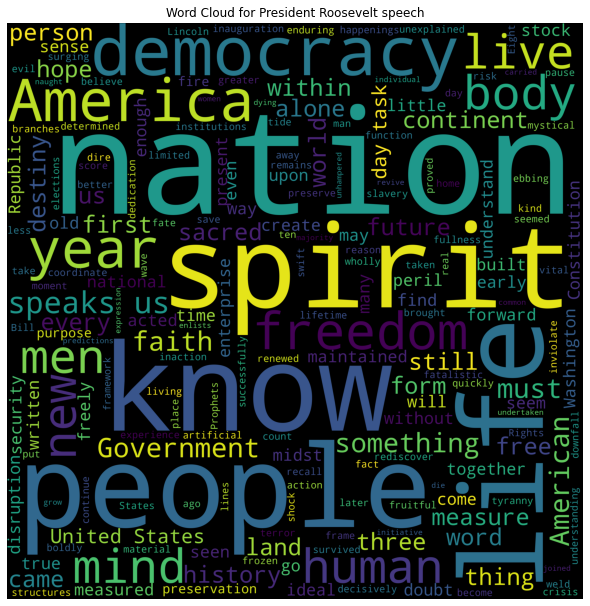

In [334]:
import matplotlib.pyplot as plt

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(' '.join(x_split_words_pt)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for President Roosevelt speech")
plt.show()


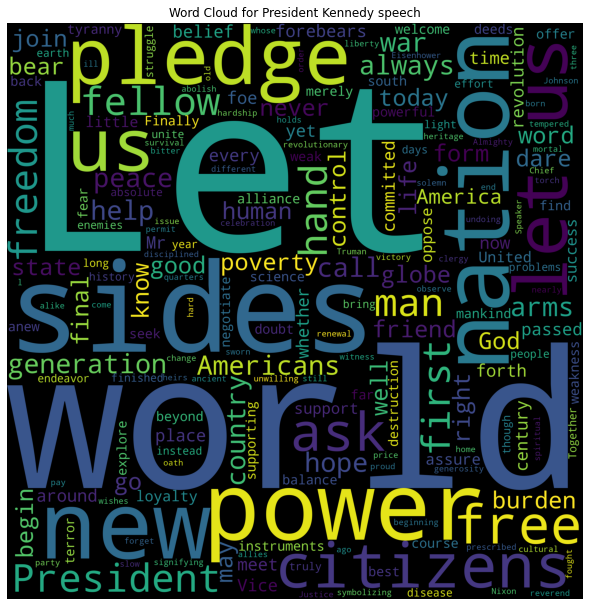

In [335]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(' '.join(y_split_words_pt)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for President Kennedy speech")
plt.show()

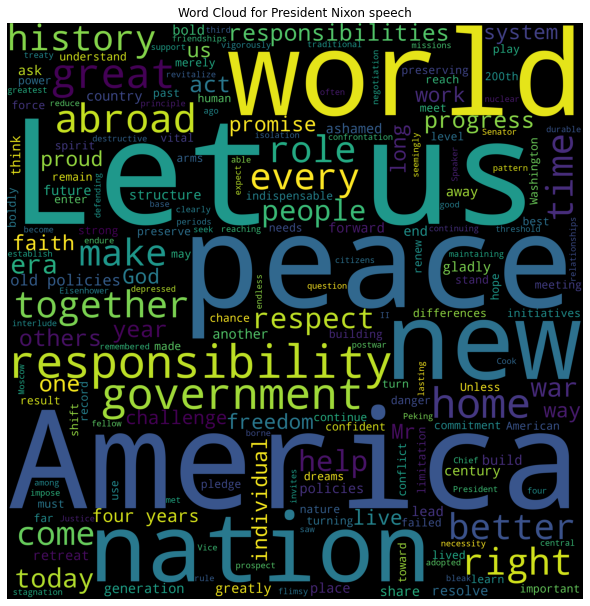

In [336]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(' '.join(z_split_words_pt)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for President Nixon speech")
plt.show()